# 高斯玻色采样模拟分子振动光谱

此研究涉及两个主要领域。其中之一是关于量子信息和量子计算机的研究。我们选择**玻色采样**进行讨论。
目前，有多种物理实现方式可以进行玻色子取样，但最常见的是光子解决方案。
在该方案中，单光子态被用作输入到干涉仪，在输出端测量光子数。
干涉装置相对简单；而制备单光子和测量光子数对仪器的要求较高。
因此，如果我们考虑使用相干激光，可以让实验简便一些。
由于相干态可以用高斯分布描述，这种类型的玻色子采样被称为高斯玻色采样。


另一个主要领域是**光谱学**。我们以分子振动光谱为例，模拟不同带电态之间转变的概率，从而近似确定分子振动谱。
这种方法可以使用高斯玻色采样来实现。
参考 [Huh](https://doi.org/10.1038/nphoton.2015.153) 的研究工作，我们在基于玻色采样的模拟器上实现该模拟过程。

## 高斯玻色采样

量子比特是一个抽象的二维量子物理系统。
其希尔伯特空间通常可由两个基态 $\left|0\right\rangle$ 和 $\left|1\right\rangle$ 来描述。
不同量子比特可以处于叠加态和纠缠状态。
我们可将其推广到3维、4维以至有限的 $d$-维空间中。

以上内容可以进一步推广到无限维度。
玻色子粒子是这种类型的量子物理系统的一个例子，其中在给定状态中可以有无限多个粒子。
这样的系统仍然是量子系统，仍具有叠加和纠缠性。
在可数无限维度情况下，量子态被称为 qumodes。

在真实物理系统中，任何物理量都需要通过多次测量来确定其状态分布。
因此量子计算机都是对抽样问题的物理实现。
在可数无限维度的情况下，这被称为玻色子采样。

在多种玻色采样的物理实现方式中，最简单的仍然是光子方案。
量子光学设备在 qumodes 上为幺正算符。常用高斯算符如下：


$$\mathcal{P}_{i}\left(\phi\right)=e^{-i\phi a_{i}^{\dagger}a_{i}}$$

$$\mathcal{D}_{i}\left(\alpha\right)=e^{\alpha a_{i}^{\dagger}-\alpha^{*}a_{i}}$$

$$\mathcal{S}_{i}\left(\zeta\right)=e^{\frac{1}{2}\left(\zeta^{*}a_{i}^{2}-\zeta a_{i}^{\dagger2}\right)}$$

$$\mathcal{B}_{ij}\left(\theta\right)=e^{\theta\left(a_{i}^{\dagger}a_{j}-a_{i}a_{j}^{\dagger}\right)}$$


事实上，一个纯的光子数态，即 $\left|n\right\rangle$, 在技术上很难做到。
$\left|1\right\rangle$ 意味着特定量子模式中只有一个光子。
精确地产生一个光子是一项巨大挑战。
而相干光是每个量子模式的可数无限状态之和，高斯玻色采样以相干光作为输入，是一种更简单的解决方案。

## 分子的振动光谱简要描述

<div align=center>
	<img src="./fig/Franck_Condon_Diagram.png" width="30%"/>	
</div>

<center>
  <a href="https://chem.libretexts.org/@api/deki/files/79071/800px-Franck_Condon_Diagram.svg.png?revision=1">Franck–Condon原理能级图</a>
</center>

光谱学的一个主要问题是检查原子和分子之间电荷状态的跃迁。
分子吸收的光频率便是取决于不同电子态之间的允许跃迁。
这些电子跃迁可能伴随着分子振动能量的变化。
在这种情况下，代表更强烈吸收光的频率的吸收线被称为振动光谱。
然而，除了氢原子可以被精确解决外，随着电子数量增加，量子力学方程变得指数级复杂，使得对它们的计算变得不可能。因此必须使用近似方法。

如果假设核和电子状态是独立的，对于极其复杂的分子系统，一个很好的近似称为玻恩-奥本海默近似。
由于原子核的质量较大，其对电子壳层变化反应更慢，因此在 Franck-Condon 原理中可以将原子核视为恒定。

通过用简单的量子谐振子来近似电子的振动，可以将电子的哈密顿算符写成反应坐标的函数。
然后，电子势能表面已经可以用抛物线描述。

$$\mathcal{H}=p^{2}+q^{2}$$

Duschinsky 提出一种近似方法，不同电子态的简正坐标之间存在线性关系

$$q'=U_{D}q+d$$

Doktorov 证明，在这些条件下，对于这样的量子谐振子，不同势能面上的量子态 $\left|\phi\right\rangle$ 和 $\left|\phi'\right\rangle$ 之间的关系可以用以下方式给出:

$$\left|\phi'\right\rangle =U_{Dokt}\left|\phi\right\rangle  $$

其中，Doktorov 算子定义为

$$U_{Dok}=D\left(d\right)S^{\dagger}\left(\Omega'\right)R\left(U_{Dusch}\right)S_{\Omega}\left(\Omega\right)$$

- 旋转算符的输入参数是Duschinsky混合矩阵本身

- 位移算符D的参数是Duschinsky位移
- 压缩算符是从分子的物理特性推导出来的。$\Omega$ 和 $\Omega'$ 是分子内原子在发生跃迁前后谐波的角频率

上面哈密顿量的本征值问题的解是 Fock 空间中的相干态。高斯算符作用于它们之后，将一个相干态转换为另一个相干态。
不同电子态之间的转移概率，即所谓的 Franck-Condon 因子，可以近似表示为

$$
FCF_{n',n}	=\left|\left\langle \phi'|\phi\right\rangle \right|^{2}
	=\left|\left\langle n'\right|U_{Dokt}\left|n\right\rangle \right|^{2}
$$
	
玻色子采样的计算在于对 qumodes 进行旋转矩阵操作。
在我们计算振动光谱时，使用上面的 Doktorov 算符。其过程为

1. 制备相干态

2. 将相干态传输到一个玻色采样设备，以获得转移概率
3. 进行第二次压缩，测量各模式分布，进一步计算FCF



### Hessian matrix

对于一双原子分子，假设谐振子势能

$$V=\frac{k}{2}(r-r_e)^2$$

其中 $r$ 是两个核之间的距离，$r_e$ 是它们的平衡距离。
简单起见，可只考虑X轴。我们可以用两个原子的笛卡尔坐标 $x_1$（对应原子1）和 $x_2$（对应原子2）来表示这一点。
则，$r = x_2 - x_1$。

势能的二阶导数是：

$$\frac{d^{2}V}{dx_{1}^{2}}=k$$

$$\frac{d^{2}V}{dx_{2}^{2}}=k$$

$$\frac{d^{2}V}{dx_{1}dx_{2}}=\frac{d^{2}V}{dx_{2}dx_{1}}=-k$$


Hessian矩阵（仅针对x方向）为：

$$
H=\left(\begin{array}{cc}
k & -k\\
-k & k
\end{array}\right)
$$

质量加权的Hessian矩阵是：

$$
F=\left(\begin{array}{cc}
\frac{k}{m_{1}} & -\frac{k}{\sqrt{m_{1}m_{2}}}\\
-\frac{k}{\sqrt{m_{1}m_{2}}} & \frac{k}{m_{2}}
\end{array}\right)
$$

如果我们有了系统的Hessian矩阵和质量加权Hessian矩阵，就可以由特征向量定义质量加权简正模式。
接着，利用分子的平衡结构坐标数据、质量加权简正坐标等数据可以求解所需高斯算符参数。


[Jankowiak](https://pubs.aip.org/aip/jcp/article-abstract/127/23/234101/906357/Vibronic-transitions-in-large-molecular-systems?redirectedFrom=fulltext)的补充材料提供了一些分子的相关数据。
我们以甲酸（$1^{1}A'\rightarrow1^{2}A'$）为例计算分子振动光谱：

In [13]:
import numpy as np
import deepquantum as dq
import torch
import matplotlib.pyplot as plt

$1^1A'$ 态及$1^2A'$ 态的平衡结构坐标如下

In [14]:
ri = np.genfromtxt("./data/formic_ri.csv", delimiter=",", skip_header=0)[:, np.newaxis]
rf = np.genfromtxt("./data/formic_rf.csv", delimiter=",", skip_header=0)[:, np.newaxis]

$1^1A'$ 态及 $1^2A'$ 态的质量加权简正坐标如下

In [15]:
li = np.genfromtxt("./data/formic_li.csv", delimiter=",", skip_header=0)
lf = np.genfromtxt("./data/formic_lf.csv", delimiter=",", skip_header=0)

$1^1A'$ 态及 $1^2A'$ 态简正模式频率如下

In [16]:
omega = np.genfromtxt("./data/formic_omega.csv", delimiter=",", skip_header=0)
omegap = np.genfromtxt("./data/formic_omegap.csv", delimiter=",", skip_header=0)

计算中用到的物理学常量

In [17]:
c = 299792458.0  # 光速
mu = 1.6605390666 * 10**-27  # 原子质量单位
h = 6.62607015 * 10**-34  # 普朗克常数

m_c = 12  # 碳原子相对原子质量
m_h = 1.007825037  # 氢原子相对原子质量
m_o = 15.994914640  # 氧原子相对原子质量

Duschinsky 矩阵 $U$ 及位移矢量 $\delta$ 计算如下

In [18]:
u = []
for li_ele in li:
    for lf_elf in lf:
        u.append(np.sum(li_ele * lf_elf))
u = np.array(u[-1::-1]).reshape(7, 7).T
u

array([[ 0.99343181,  0.01440011,  0.01532633,  0.02861045,  0.06378083,
         0.07513988, -0.04280796],
       [-0.01485231,  0.99314303,  0.07419536,  0.0769291 , -0.03610189,
        -0.00248855,  0.01727882],
       [-0.01185718, -0.09164895,  0.84227531,  0.17994129, -0.38567948,
         0.30738928,  0.08008576],
       [ 0.03813492,  0.04087165, -0.34031972, -0.52311845, -0.66785609,
         0.38477092,  0.11420873],
       [-0.04133251, -0.03419326, -0.40036477,  0.76362651, -0.10356638,
         0.48381836,  0.09406589],
       [ 0.0907918 , -0.04184572, -0.09066643,  0.31511355, -0.59003401,
        -0.719268  ,  0.13037051],
       [-0.03245558,  0.00500992, -0.02063661,  0.06935002, -0.20181377,
         0.01732396, -0.97588364]])

In [19]:
delta = []
m = np.diag([m_c, m_c, m_c, m_o, m_o, m_o, m_o, m_o, m_o, m_h, m_h, m_h, m_h, m_h, m_h])
for i in range(len(omegap)):
    d = lf[i].T @ np.sqrt(m) @ (ri - rf)
    l = np.sqrt(h / (4 * np.pi**2 * 100 * omegap[i] * c * mu)) / (10**-10)
    delta.append(d / l)
delta = np.array(delta[-1::-1])
delta

array([[ 0.22536617],
       [ 0.14689208],
       [ 1.55989779],
       [-0.37838396],
       [ 0.45525871],
       [-0.34391138],
       [ 0.06184607]])

在用于计算振动光谱的GBS算法中，以上这些化学参数足以确定GBS设备的配置。
利用这些数据，我们即可计算甲酸分子振动光谱。

实际上，在可能仅涉及有限数量的光子的情况下需要**非线性相互作用**，第二次挤压操作在光学装置中难以实现。
通常，我们需要将两次挤压操作压缩为一次：

$$U_{Dok}=R_{C_{L}}S_{\Sigma}^{\dagger}R_{C_{R}}D_{2^{-1/2}J^{-1}\delta}$$

其中
$$J=\Omega'U\Omega^{-1}$$
$$\delta=\hbar^{-1/2}\Omega'd$$
$$J=C_{L}\Sigma C_{R}^{t}$$

各 GBS 参数计算如下：

In [20]:
pre_transition_squeezing = np.sqrt(omega[-1::-1])
post_transition_squeezing = np.sqrt(omegap[-1::-1])

j_mat = (
    np.diag(post_transition_squeezing)
    @ u
    @ np.linalg.inv(np.diag(pre_transition_squeezing))
)

cl, lambda_1, cr = np.linalg.svd(j_mat)

delta_2 = np.linalg.inv(j_mat) @ delta / np.sqrt(2)
delta_2 = delta_2.flatten()
lambda_2 = np.log(lambda_1)

### 甲酸分子振动光谱计算如下所示

In [21]:
modes = 7  # 简正模式数量
cutoff = 3
shots = 500000

In [22]:
cir = dq.photonic.QumodeCircuit(
    nmode=modes,
    init_state="vac",
    # init_state=init_state,
    cutoff=cutoff,
    backend="gaussian",
)

for i in range(modes):
    cir.d(wires=[i], r=delta_2[i])

cir.any(cr, wires=list(range(modes)))

for i in range(modes):
    cir.s(wires=[i], r=-lambda_2[i])

cir.any(cl, wires=list(range(modes)))

state = cir()

# 线路可视化
cir.draw()

In [23]:
sample = cir.measure(shots=shots)

chain 5: 100%|█████████████████████████| 99999/99999 [00:02<00:00, 35294.55it/s]


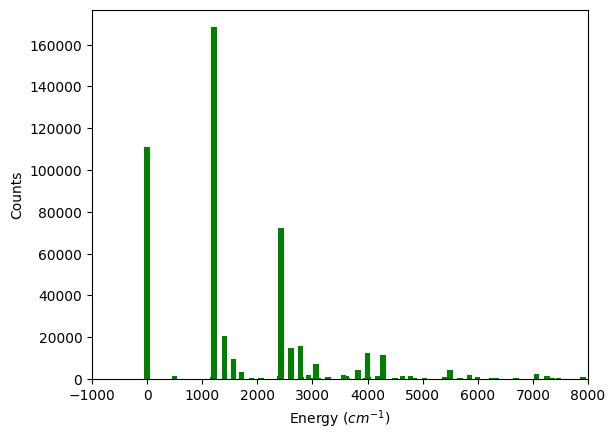

In [24]:
wave_number = []
counts = []
for ele in sample.items():
    # print(ele[0].state)
    wave_number.append(torch.sum(ele[0].state * omegap))
    counts.append(ele[1])

plt.bar(wave_number, counts, width=100, color="g")

plt.xlabel(r"Energy $(cm^{-1})$")
plt.ylabel(r"Counts")
plt.xlim(-1000, 8000)
plt.show()

### 参考结果


<div align=center>
	<img src="./fig/formic_spec.png" width="60%"/>	
</div>

<center>
  <a href="https://strawberryfields.ai/photonics/apps/run_tutorial_vibronic.html">甲酸分子振动光谱图</a>
</center>